In [81]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [82]:
# Read in data as .csv file

file_loc = os.getcwd() + "/ppo_training_logs/training_log_SpaceInvaders.csv"
print(file_loc)
log_file = pd.read_csv(filepath_or_buffer= file_loc, header= None, index_col= None, names= ["Epoch", "Score", "Duration"])

/Users/patrickowens/Documents/ai_local/group_project/ai/ppo/ppo_training_logs/training_log_SpaceInvaders.csv


In [83]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(log_file) - 1):
    if((log_file.iloc[(i + 1),0] - log_file.iloc[i,0]) < 0):
        diff = log_file.iloc[i,0]

    log_file.iloc[i,0] += addition
    addition += diff
    diff = 0
log_file.iloc[(len(log_file) - 1),0] += addition

np_data = log_file.to_numpy()

In [84]:
log_file

,Epoch,Score,Duration
0,97,50,1.220311
1,290,90,2.390122
2,460,110,2.013024
3,610,125,1.996266
4,752,50,1.831350
...,...,...,...
24921,5646163,285,2.924485
24922,5646502,510,4.081235
24923,5646788,555,3.856481
24924,5647083,520,3.650200


In [104]:
chunks = np.array_split(np_data, 50)
chunked_data = np.zeros((3, len(chunks)))

chunked_data[1:, 0] = np.average(chunks[0][:,1:], 0)

for i in range(len(chunks)):
    chunked_data[:,i] = np.append(chunks[i][-1,0], np.mean(chunks[i][:,1:], 0))
chunked_data = np.transpose(chunked_data)    

In [109]:
np.std(chunks[-1][:,1])

164.75643981567006

In [105]:
pd.DataFrame(chunked_data)

,0,1,2
0,116472.0,220.931864,2.924893
1,232733.0,188.336673,4.274318
2,351684.0,218.086172,4.468675
3,471798.0,245.681363,4.535475
4,591813.0,255.671343,4.496568
5,708737.0,224.388778,4.321904
6,832632.0,256.262525,4.574831
7,961684.0,284.719439,4.846129
8,1085637.0,283.186373,4.673886
9,1203220.0,275.731463,4.416819


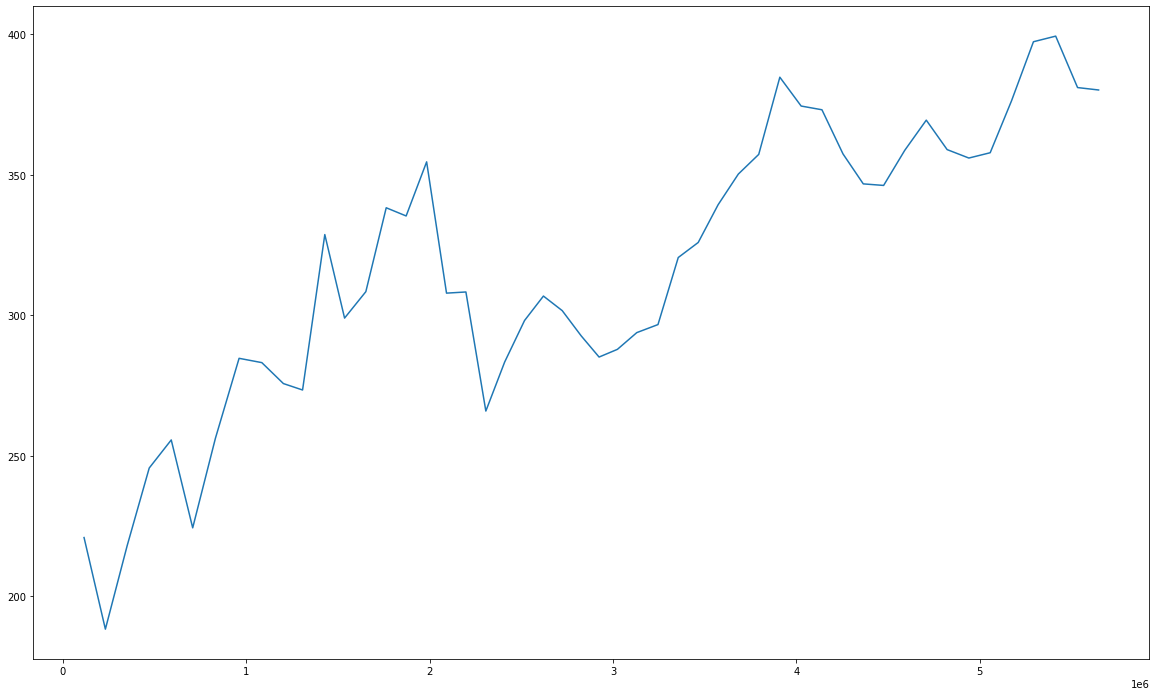

In [106]:
# Display on the plot as epoch versus score

#print(np_data[:,0])
plt.figure(figsize = (20,12))
plt.plot(chunked_data[:,0], chunked_data[:,1])
plt.show()

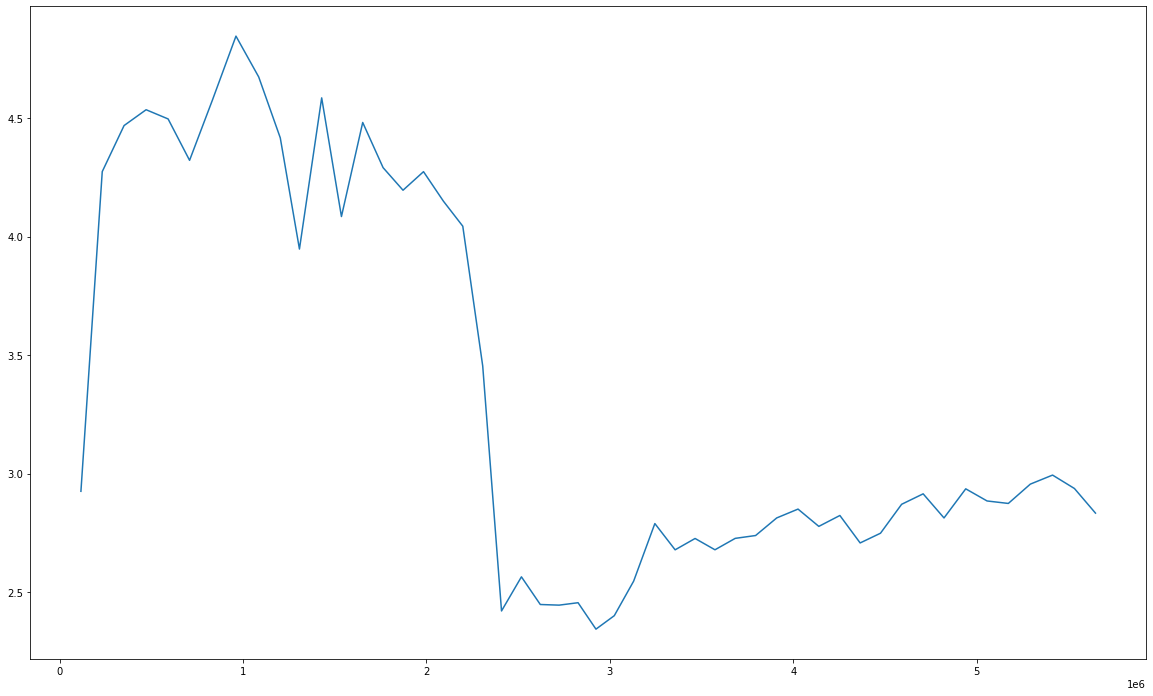

In [107]:
# Display on the plot as epoch versus game duration

#print(np_data[:,0])
plt.figure(figsize = (20,12))
plt.plot(chunked_data[:,0], chunked_data[:,2])
plt.show()